In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rubin_sim.maf as maf

In [3]:
# Read in csv downloads of Philipe's SN metric outputs
# https://docs.google.com/spreadsheets/d/12Q9-oMdFNMgRKVQ-ACTAroWfYSbhrdvaOVMkDiZnwGQ/edit?usp=sharing
# https://docs.google.com/spreadsheets/d/1PG_nY50XPpLUJsk42lFAunfYMhOd81OiZB0UDJboJfQ/edit?usp=sharing

pgris2_0 = pd.read_csv('SN_pgris_2.0.csv', index_col=0)
pgris2_1 = pd.read_csv('SN_pgris_2.1.csv', index_col=0)
pgris = pd.concat([pgris2_0, pgris2_1])
pgris.to_csv('SN_pgris.csv')
pgris0 = pd.read_csv('sn_pgris', index_col=0)
print(len(pgris), len(pgris2_0), len(pgris2_1), len(pgris0))
pgris.head()

261 122 139 24


,zcomp,nsn,deltaN,deltaz
Observing Strategy,,,,
baseline_retrofoot_v2.0_10yrs,0.2806,87241.8597,-0.0454,0.0026
baseline_v2.0_10yrs,0.2780,91395.0009,0.0000,0.0000
bluer_indx0_v2.0_10yrs,0.2708,85201.2105,-0.0678,-0.0072
bluer_indx1_v2.0_10yrs,0.2721,84877.2988,-0.0713,-0.0058
carina_v2.0_10yrs,0.2748,98590.3614,0.0787,-0.0032


In [4]:
summaries = maf.get_metric_summaries(summary_source='summary_2022_06_22.csv')
families = maf.get_family_descriptions()

In [5]:
# What are the names of our SN metric outputs again? 
[m for m in summaries if 'NSN' in m and "DD" not in m]

['Median SNNSNMetric_nSN  HealpixSlicer',
 'Mean SNNSNMetric_nSN  HealpixSlicer',
 'Total detected SNNSNMetric_nSN  HealpixSlicer',
 'Total on sky SNNSNMetric_nSN  HealpixSlicer',
 'Median SNNSNMetric_zlim  HealpixSlicer',
 'Mean SNNSNMetric_zlim  HealpixSlicer',
 'Total detected SNNSNMetric_zlim  HealpixSlicer',
 'Total on sky SNNSNMetric_zlim  HealpixSlicer']

In [6]:
# Pull out those metrics
metrics = ['Total detected SNNSNMetric_nSN  HealpixSlicer', 'Median SNNSNMetric_zlim  HealpixSlicer']

In [11]:
# Combine into a single dataframe
comparison = pgris.join(summaries[metrics], how='right')
comparison.drop(['deltaN', 'deltaz'], inplace=True, axis=1)
print(len(comparison), len(pgris), len(summaries))
comparison.head()

308 261 308


,zcomp,nsn,Total detected SNNSNMetric_nSN HealpixSlicer,Median SNNSNMetric_zlim HealpixSlicer
run,,,,
too_rate10_v2.0_10yrs,0.2764,89465.4685,24193.660,0.200
noroll_v2.0_10yrs,0.2631,87941.3909,17873.025,0.225
long_gaps_nightsoff1_delayed1827_v2.0_10yrs,0.2728,83660.2880,22102.436,0.200
presto_half_gap2.5_mix_v2.0_10yrs,0.2668,66299.9085,17024.274,0.225
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs,0.2742,85386.2960,22625.440,0.225


In [13]:
# Make a short metric_set for easier and consistent plotting
metrics = ['nsn', 'Total detected SNNSNMetric_nSN  HealpixSlicer',
          'zcomp', 'Median SNNSNMetric_zlim  HealpixSlicer']
short_names = ['pgris nsn', 'old maf nsn',
              'pgris zlim', 'old maf zlim']
style = ['r-', 'k-', 'r:' , 'k:']
mset = maf.create_metric_set_df('comp', metrics=metrics, short_name=short_names, style=style)
mset = mset.loc['comp']

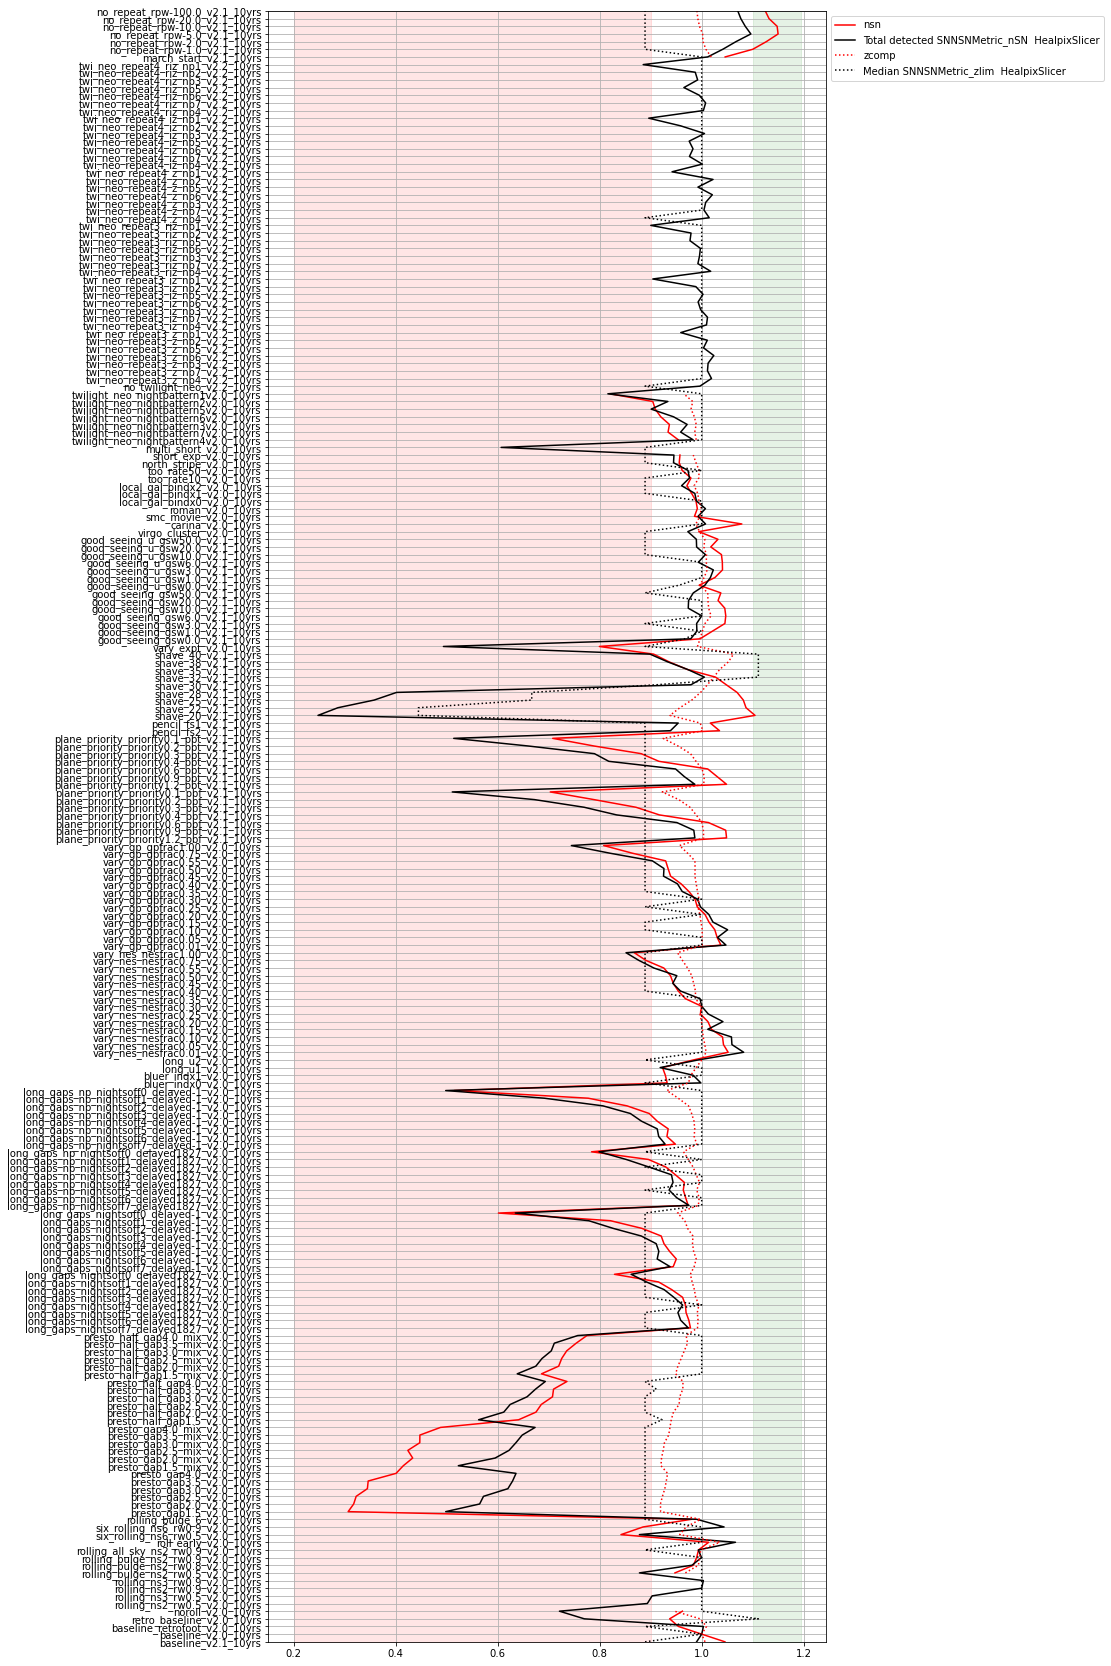

In [22]:
# Plot Normalized results
nondd = [f for f in families.index if not f.startswith('ddf')]
these_runs = families.explode('run').loc[nondd, 'run']
fig, ax = maf.plot_run_metric(comparison.loc[these_runs, mset['metric']], 
                     'baseline_v2.0_10yrs', 
                     metric_set=mset,
                             shade_fraction=.1)
fig.set_figheight(30)

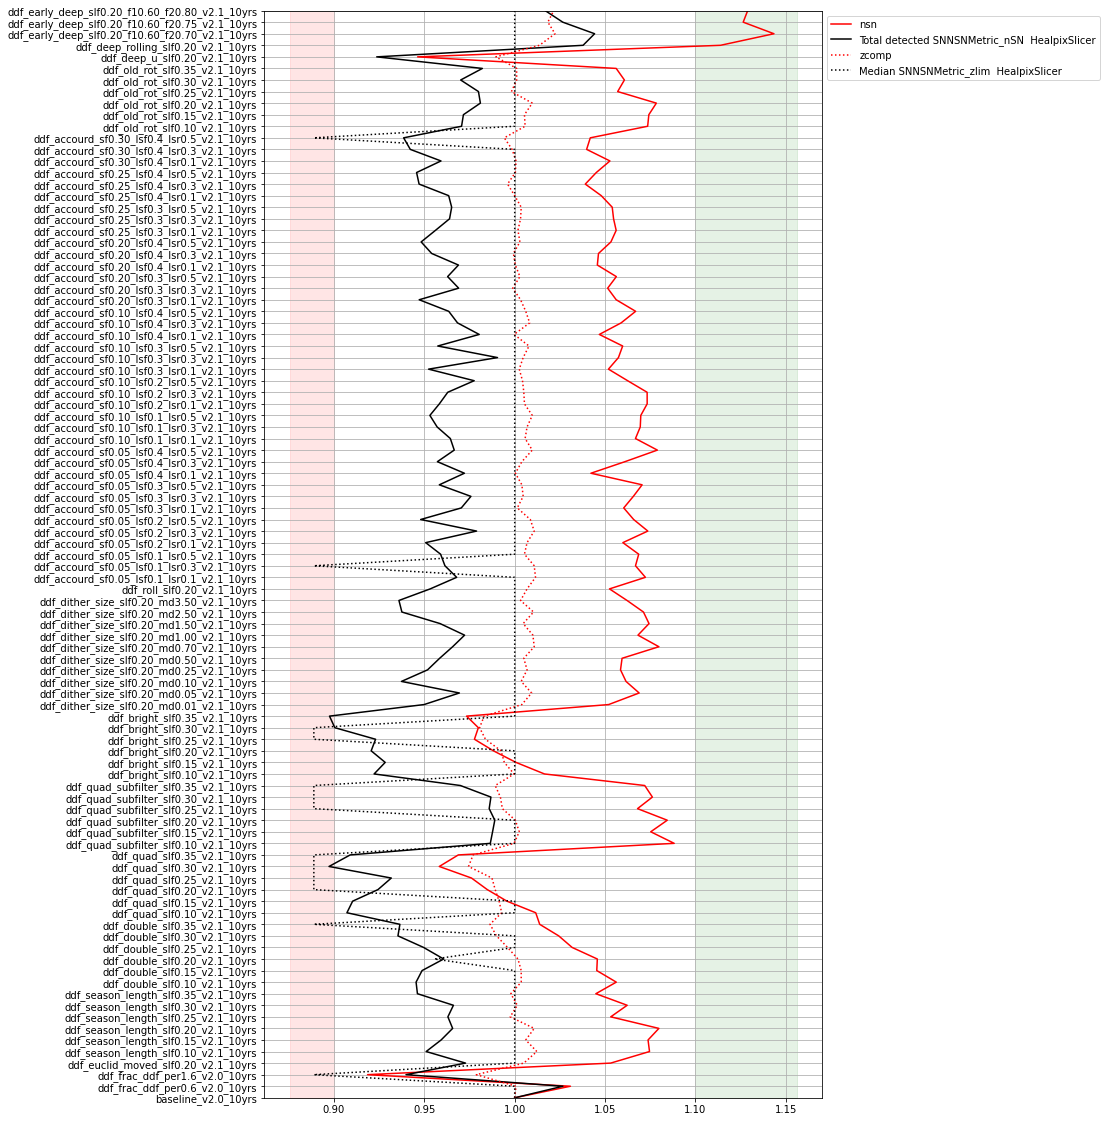

In [23]:
dd = [f for f in families.index if f.startswith('ddf')]
these_runs = np.concatenate([['baseline_v2.0_10yrs'], families.explode('run').loc[dd, 'run'].to_list()])
fig, ax = maf.plot_run_metric(comparison.loc[these_runs, mset['metric']], 
                     'baseline_v2.0_10yrs', 
                     metric_set=mset,
                             shade_fraction=0.1)
fig.set_figheight(20)

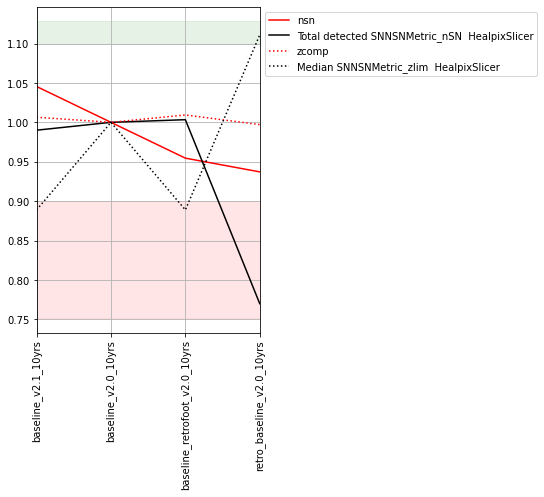

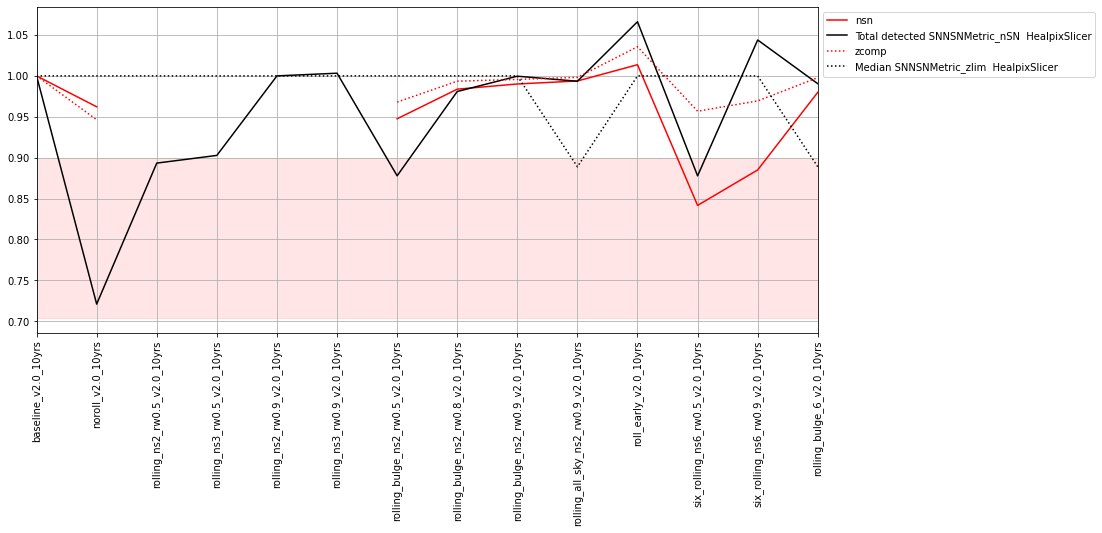

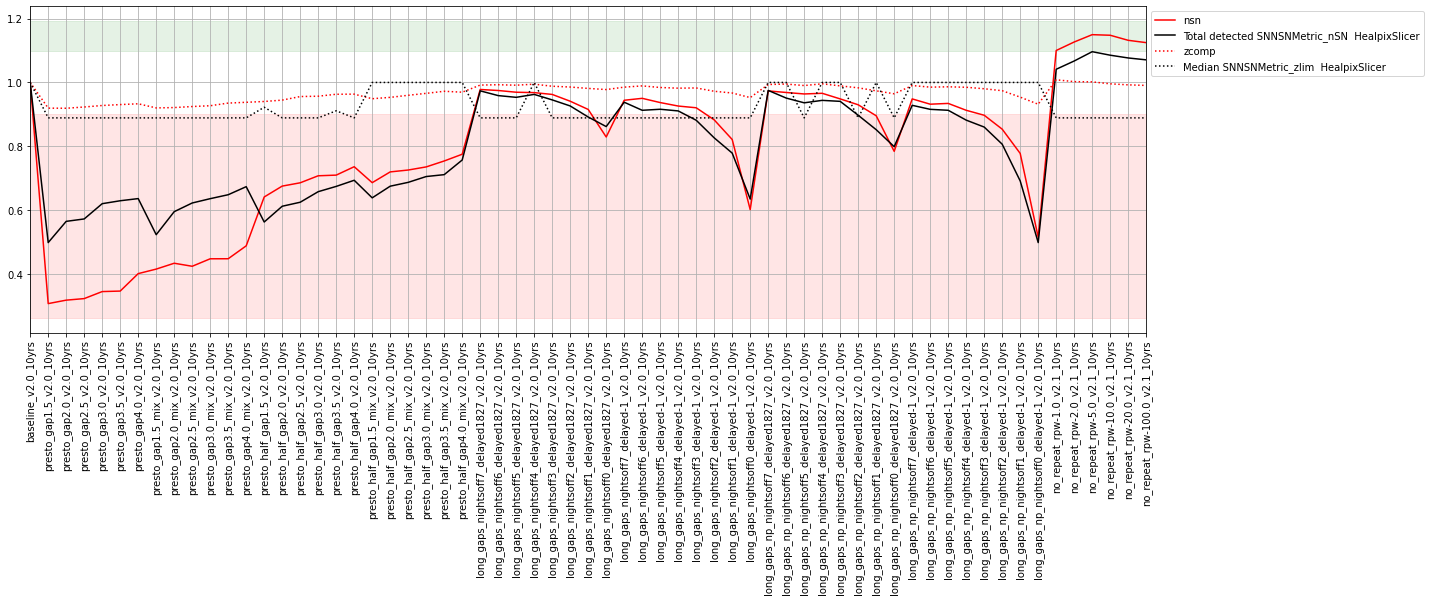

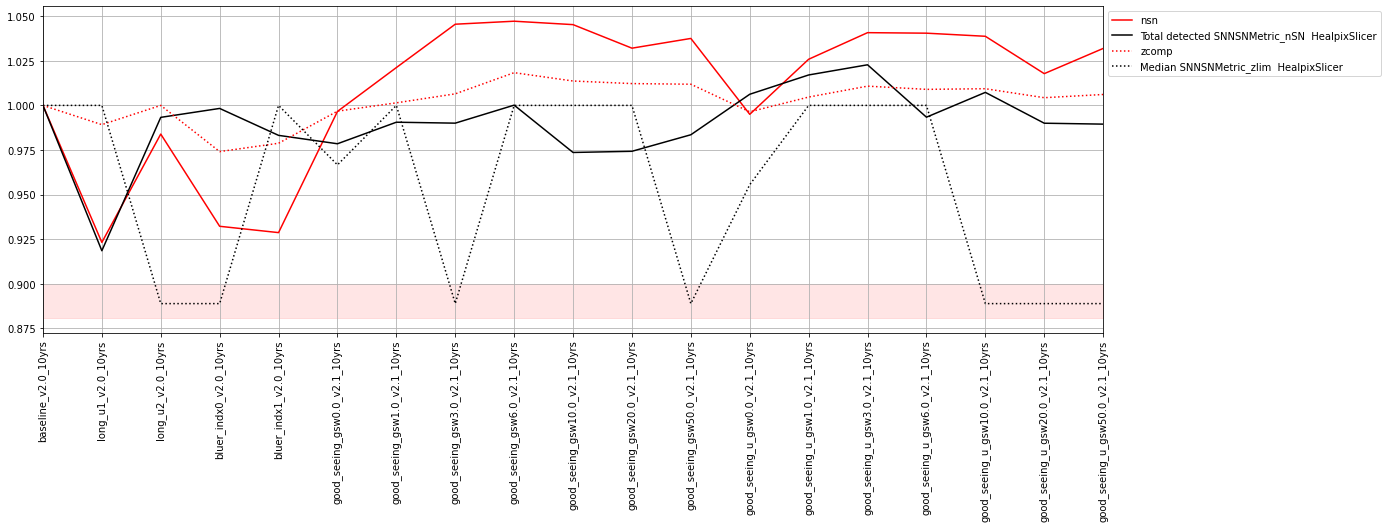

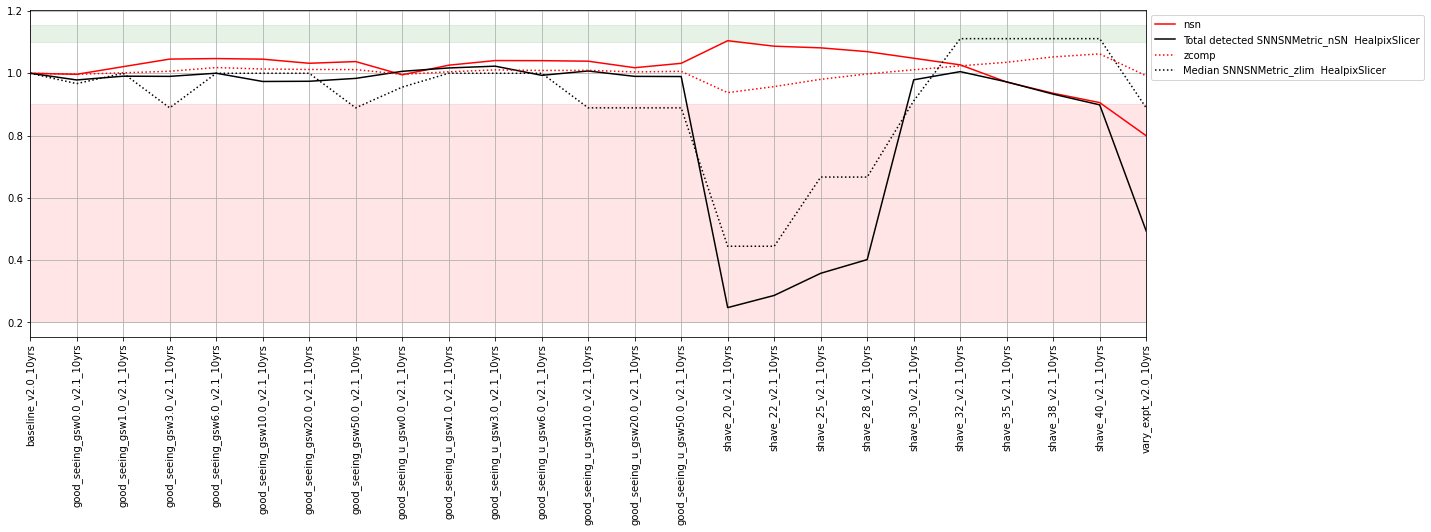

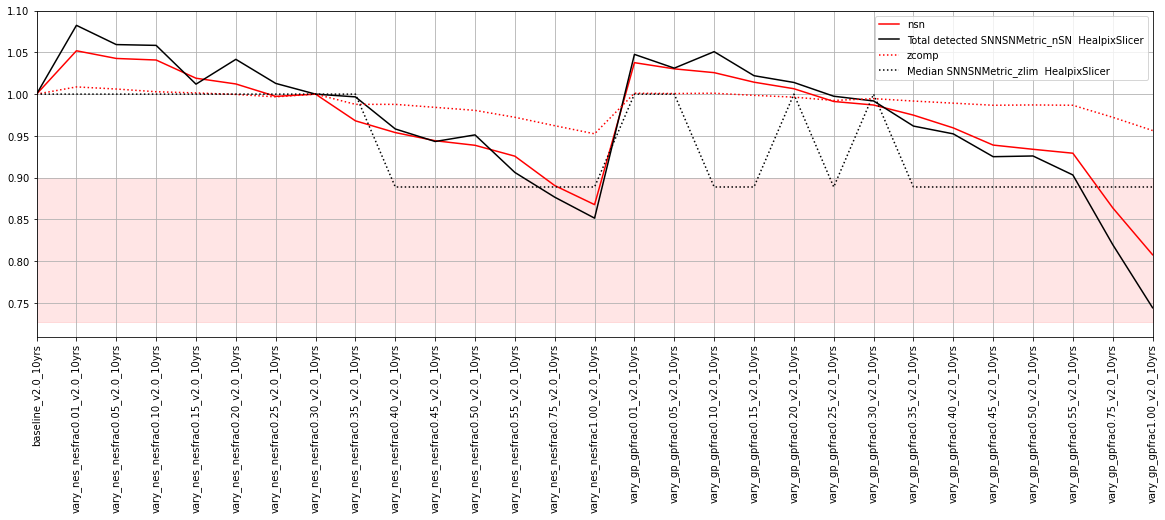

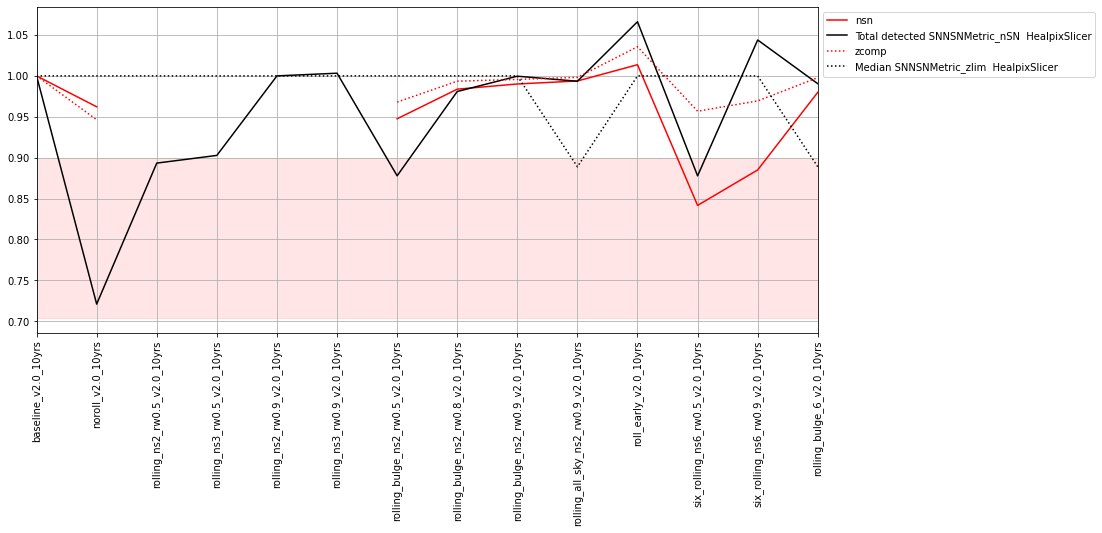

In [24]:
for fams in [['baseline'], 
             ['rolling'],
             ['triplets', 'long gaps no pairs', 'suppress repeats'],
            ['longer u visits', 'bluer balance', 'good seeing'],
            ['good seeing', 'vary expt'],
            ['vary nes', 'vary gp'], 
            ['rolling']]:
    these_runs = families.explode('run').loc[fams]['run'].to_list()
    baseline_run = 'baseline_v2.0_10yrs'
    if baseline_run not in these_runs:
        these_runs = [baseline_run] + these_runs
    fig, ax = maf.plot_run_metric(comparison.loc[these_runs, mset['metric']], 
                                 baseline_run, 
                                 metric_set=mset,
                                 horizontal_quantity='run',
                                 vertical_quantity='value', shade_fraction=0.1)
    fig.set_figwidth(np.min([len(these_runs), 20]))

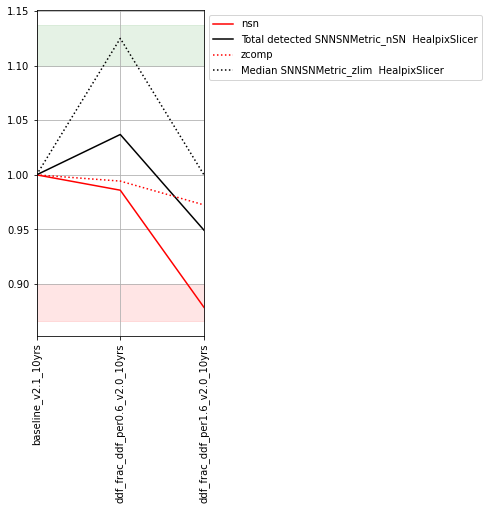

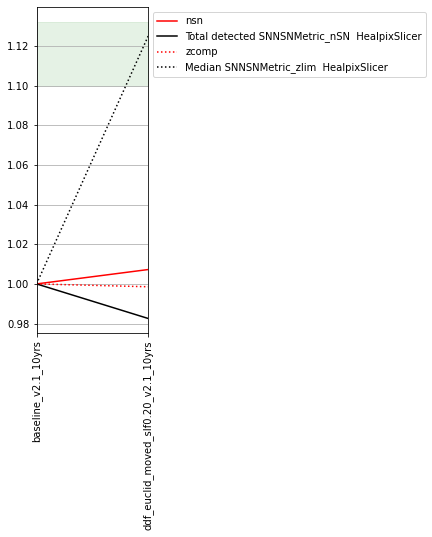

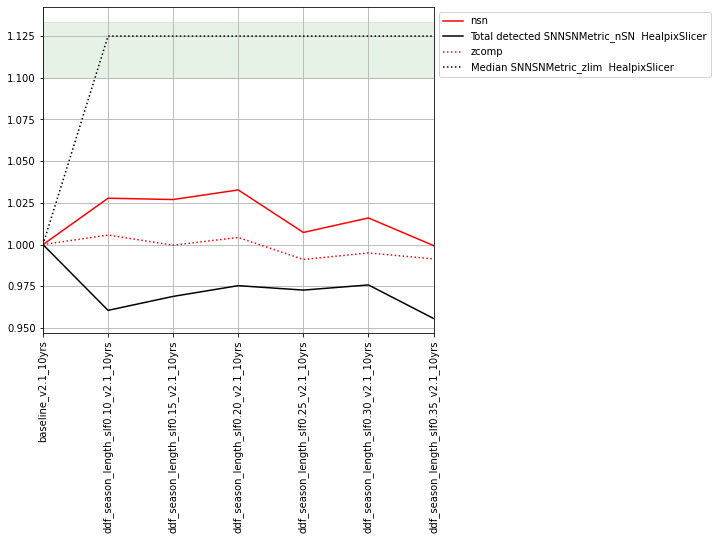

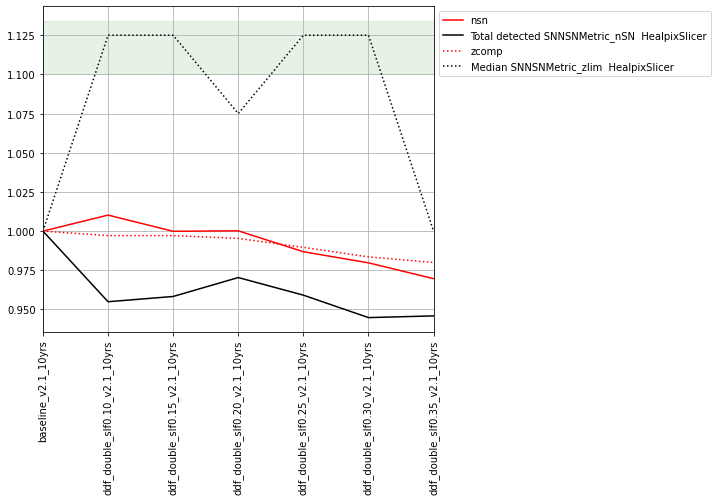

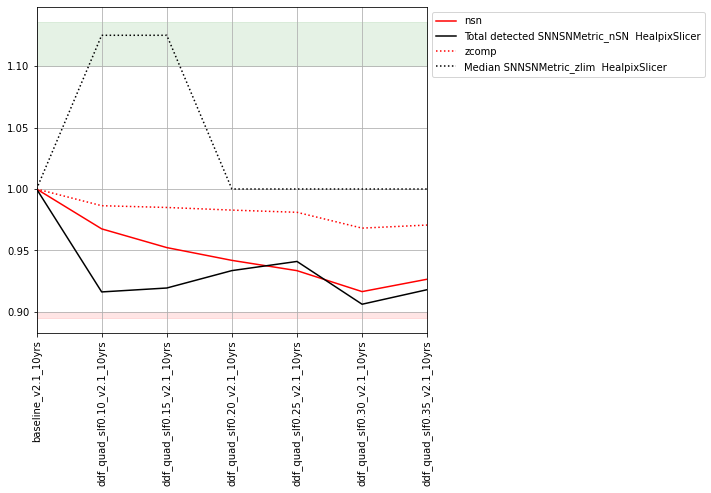

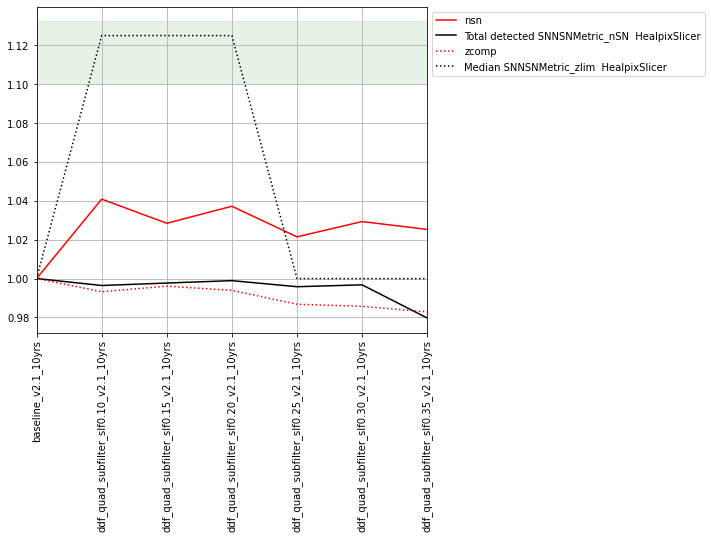

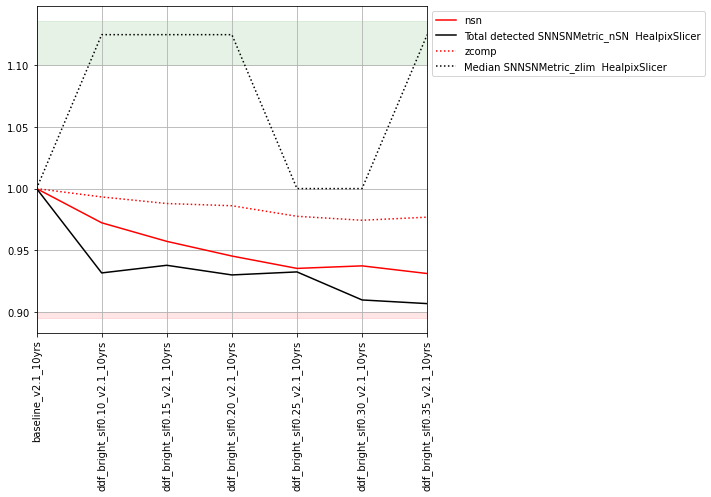

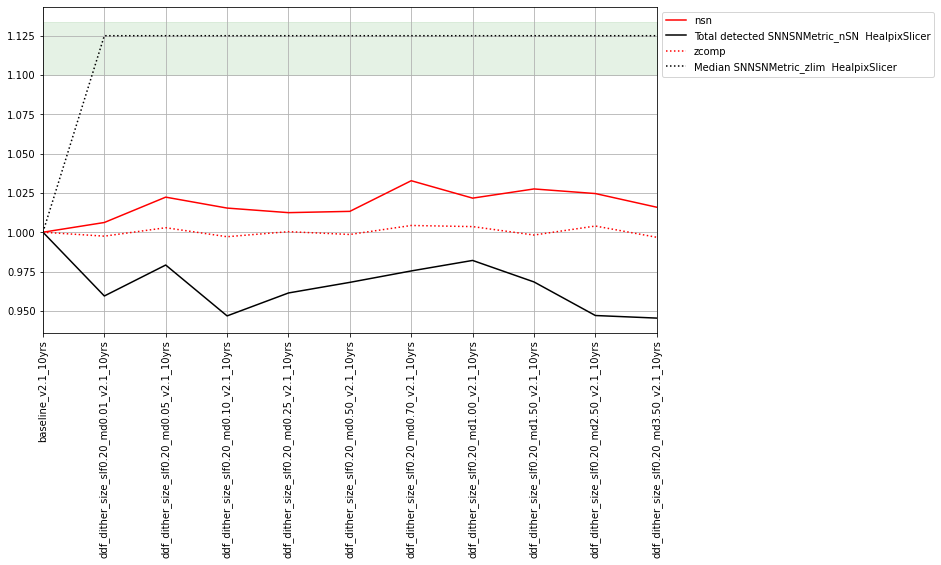

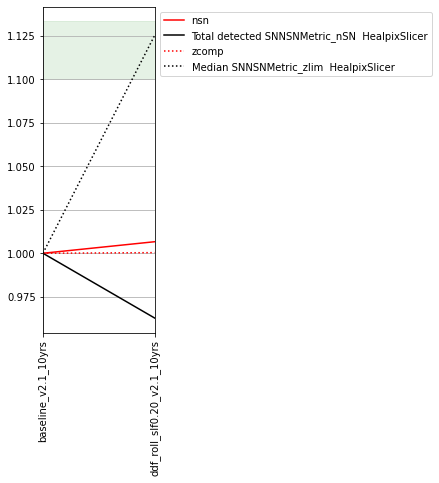

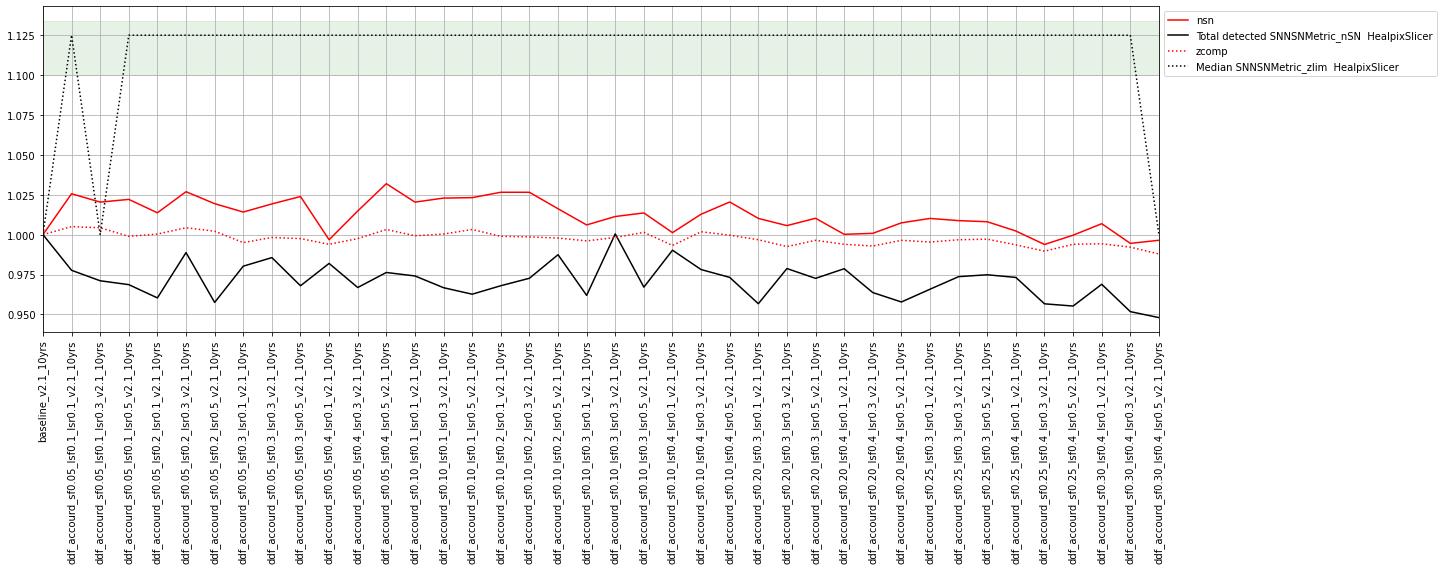

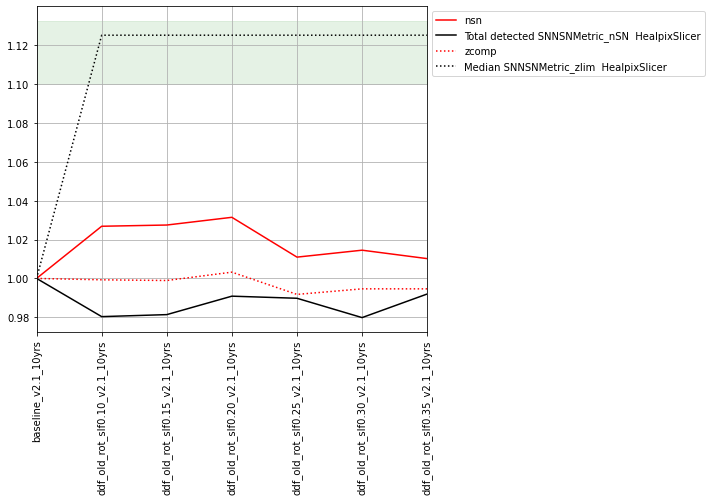

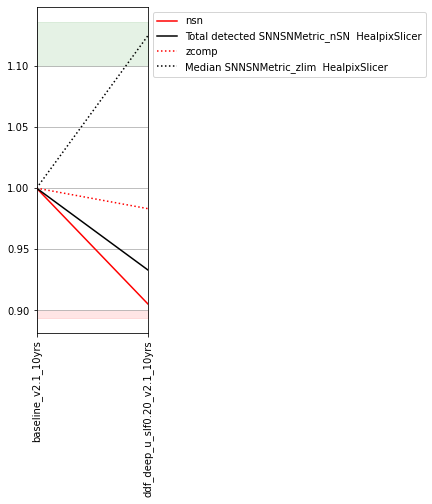

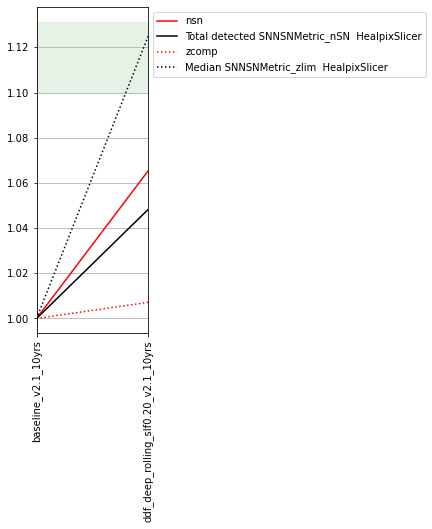

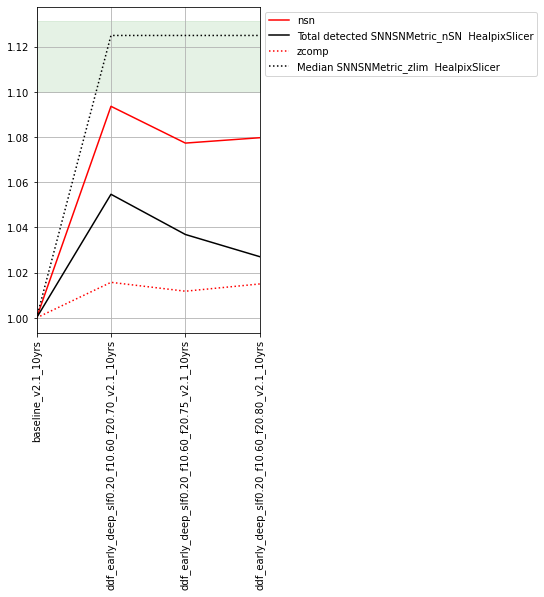

In [25]:
for fams in [f for f in families.index if f.startswith('ddf')]:
    try:
        these_runs = families.explode('run').loc[fams, 'run'].to_list()
    except AttributeError:
        these_runs = [families.explode('run').loc[fams, 'run']]
    baseline_run = 'baseline_v2.1_10yrs'
    if baseline_run not in these_runs:
        these_runs = np.concatenate([[baseline_run], these_runs])
    fig, ax = maf.plot_run_metric(comparison.loc[these_runs, mset['metric']], 
                                 baseline_run, 
                                 metric_set=mset,
                                 horizontal_quantity='run',
                                 vertical_quantity='value',
                                 shade_fraction=0.1)
    fig.set_figwidth(np.min([len(these_runs), 20]))